# Week 7
## Impartida por: Sebastien Pérez 

-------------------- 

Descargar el dataset de: http://brucehardie.com/datasets/  -  CDNOW dataset (full dataset


First of all, we are going to see what this dataset has

In [1]:

file_name = '/home/dsc/Repos/dataScienceMaster/kschool/week7/CDNOW_master/CDNOW_master.txt'


!head {file_name}

## STEP1 - We need to clean and parse the data

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(file_name, header=None)
df.head()

0
0   00001 19970101  1   11.77
1   00002 19970112  1   12.00
2   00002 19970112  5   77.00
3   00003 19970102  2   20.76
4   00003 19970330  2   20.76

In [4]:
f = open(file_name)
data = f.read()

In [5]:
data[:200]

' 00001 19970101  1   11.77\n 00002 19970112  1   12.00\n 00002 19970112  5   77.00\n 00003 19970102  2   20.76\n 00003 19970330  2   20.76\n 00003 19970402  2   19.54\n 00003 19971115  5   57.45\n 00003 1997'

In [6]:
data_lines = data.split('\n')

In [7]:
data_lines[:3]

[' 00001 19970101  1   11.77',
 ' 00002 19970112  1   12.00',
 ' 00002 19970112  5   77.00']

In [8]:
data_lines_formatted = list(map(lambda line: line.split(), data_lines))

In [9]:
data_lines_formatted[:3]

[['00001', '19970101', '1', '11.77'],
 ['00002', '19970112', '1', '12.00'],
 ['00002', '19970112', '5', '77.00']]

In [10]:
df = pd.DataFrame(data_lines_formatted)
df.head()

0         1  2      3
0  00001  19970101  1  11.77
1  00002  19970112  1  12.00
2  00002  19970112  5  77.00
3  00003  19970102  2  20.76
4  00003  19970330  2  20.76

In [11]:
df.columns = ['customerID', 'date', 'quantity', 'money']

In [12]:
df.head()

customerID      date quantity  money
0      00001  19970101        1  11.77
1      00002  19970112        1  12.00
2      00002  19970112        5  77.00
3      00003  19970102        2  20.76
4      00003  19970330        2  20.76

In [13]:
df.describe()

customerID      date quantity  money
count       69659     69659    69659  69659
unique      23570       546       45   8209
top         14048  19970224        1  11.77
freq          217       504    31454   2325

In [14]:
df.dtypes

customerID    object
date          object
quantity      object
money         object
dtype: object

## Each of the columns must be converted to the appropiate format

Todo dataset tiene dimensiones y medidas. Las dimensiones no nos importa que continuen siendo cadena de caracters

In [15]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
#pd.to_datetime?

In [16]:
df.head()

customerID       date quantity  money
0      00001 1997-01-01        1  11.77
1      00002 1997-01-12        1  12.00
2      00002 1997-01-12        5  77.00
3      00003 1997-01-02        2  20.76
4      00003 1997-03-30        2  20.76

In [17]:
df.dtypes

customerID            object
date          datetime64[ns]
quantity              object
money                 object
dtype: object

In [18]:
df['quantity'] = df['quantity'].astype(float)

In [19]:
df['quantity'].astype

<bound method NDFrame.astype of 0        1.0
1        1.0
2        5.0
3        2.0
4        2.0
5        2.0
6        5.0
7        4.0
8        1.0
9        2.0
10       2.0
11       1.0
12       2.0
13       2.0
14       1.0
15       3.0
16       3.0
17       3.0
18       2.0
19       2.0
20       3.0
21       4.0
22       3.0
23       3.0
24       1.0
25       2.0
26       7.0
27       9.0
28       1.0
29       1.0
        ... 
69630    2.0
69631    2.0
69632    1.0
69633    2.0
69634    3.0
69635    2.0
69636    4.0
69637    2.0
69638    3.0
69639    3.0
69640    1.0
69641    2.0
69642    1.0
69643    3.0
69644    2.0
69645    1.0
69646    2.0
69647    1.0
69648    1.0
69649    3.0
69650    1.0
69651    2.0
69652    1.0
69653    1.0
69654    4.0
69655    1.0
69656    2.0
69657    3.0
69658    2.0
69659    NaN
Name: quantity, Length: 69660, dtype: float64>

In [20]:
df.dtypes

customerID            object
date          datetime64[ns]
quantity             float64
money                 object
dtype: object

In [21]:
df['money'] = df['money'].astype(float)

In [22]:
df.dtypes

customerID            object
date          datetime64[ns]
quantity             float64
money                float64
dtype: object

In [23]:
df.describe()

quantity         money
count  69659.000000  69659.000000
mean       2.410040     35.893648
std        2.333924     36.281942
min        1.000000      0.000000
25%        1.000000     14.490000
50%        2.000000     25.980000
75%        3.000000     43.700000
max       99.000000   1286.010000

In [24]:
df[df.isnull()['quantity']]

customerID date  quantity  money
69659       None  NaT       NaN    NaN

In [25]:
df = df.dropna()

In [26]:
df[df.isnull()['quantity']]

Empty DataFrame
Columns: [customerID, date, quantity, money]
Index: []

In [27]:
df[df.isnull()['customerID']]

Empty DataFrame
Columns: [customerID, date, quantity, money]
Index: []

In [28]:
df.describe()

quantity         money
count  69659.000000  69659.000000
mean       2.410040     35.893648
std        2.333924     36.281942
min        1.000000      0.000000
25%        1.000000     14.490000
50%        2.000000     25.980000
75%        3.000000     43.700000
max       99.000000   1286.010000

In [29]:
df.shape

(69659, 4)

In [30]:
df.columns

Index(['customerID', 'date', 'quantity', 'money'], dtype='object')

In [31]:
df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            69649, 69650, 69651, 69652, 69653, 69654, 69655, 69656, 69657,
            69658],
           dtype='int64', length=69659)

## STEP 2: Agg and filtering

--------------------

In [32]:
df_by_date = df.groupby('date').sum()

In [33]:
df_by_date.head()

quantity    money
date                         
1997-01-01     494.0  7515.35
1997-01-02     530.0  8025.95
1997-01-03     495.0  7475.04
1997-01-04     404.0  6722.93
1997-01-05     590.0  9274.80

## Plot the aggregates

In [34]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/dsc/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


** IMP: Terminando el comando plot con un punto y coma, no escribe la línea fea arriba!  **

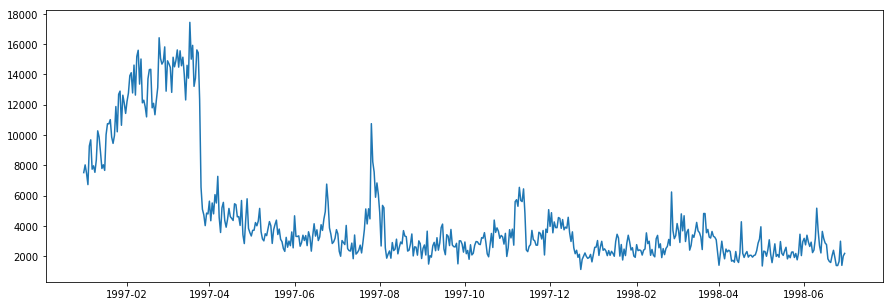

In [35]:
plt.figure(figsize(15,5))
plt.plot(df_by_date.index, df_by_date['money']);


In [36]:
df[df['customerID'] == '00007']

customerID       date  quantity   money
25      00007 1997-01-01       2.0   28.74
26      00007 1997-10-11       7.0   97.43
27      00007 1998-03-22       9.0  138.50

In [37]:
df_all_customers = df['customerID'].unique()

In [38]:
len(df_all_customers)

23570

In [39]:
from ipywidgets import interact

In [40]:
@interact(customer_id=df_all_customers[:100])
def get_data_of_customer(customer_id):
    return df[df['customerID'] == customer_id]

interactive(children=(Dropdown(description='customer_id', options=('00001', '00002', '00003', '00004', '00005', '00006', '00007', '00008', '00009', '00010', '00011', '00012', '00013', '00014', '00015', '00016', '00017', '00018', '00019', '00020', '00021', '00022', '00023', '00024', '00025', '00026', '00027', '00028', '00029', '00030', '00031', '00032', '00033', '00034', '00035', '00036', '00037', '00038', '00039', '00040', '00041', '00042', '00043', '00044', '00045', '00046', '00047', '00048', '00049', '00050', '00051', '00052', '00053', '00054', '00055', '00056', '00057', '00058', '00059', '00060', '00061', '00062', '00063', '00064', '00065', '00066', '00067', '00068', '00069', '00070', '00071', '00072', '00073', '00074', '00075', '00076', '00077', '00078', '00079', '00080', '00081', '00082', '00083', '00084', '00085', '00086', '00087', '00088', '00089', '00090', '00091', '00092', '00093', '00094', '00095', '00096', '00097', '00098', '00099', '00100'), value='00001'), Output()), _dom_classes=('widget-interact',))

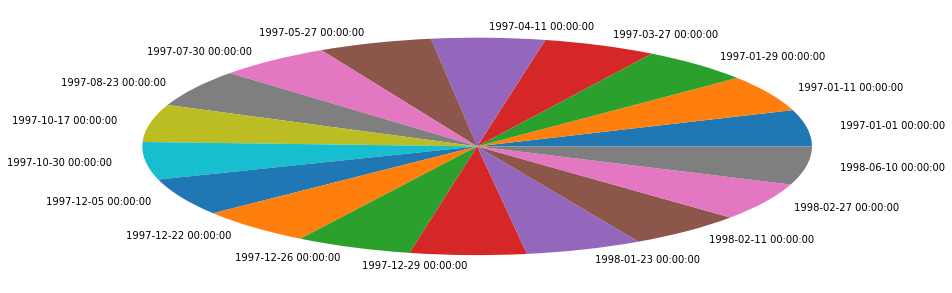

In [41]:
customer_89 = df[df['customerID'] == '00089']
plt.pie(customer_89['date'], labels=customer_89['date']);
#plt.pie?

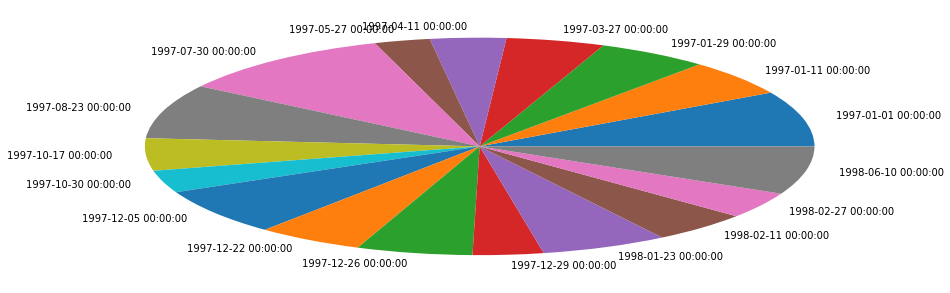

In [42]:

plt.pie(customer_89.groupby('date')['money'].sum(), labels=customer_89['date']);

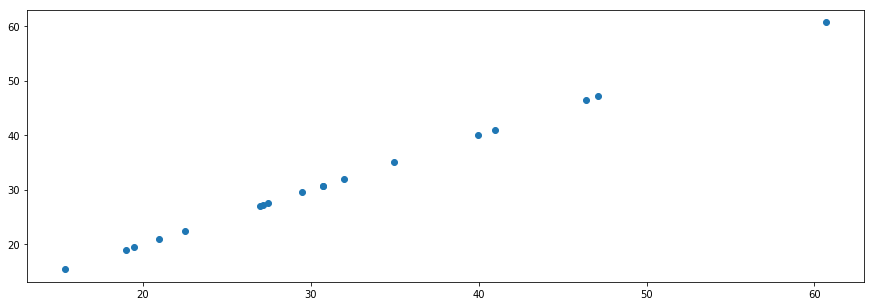

In [43]:
plt.scatter(customer_89.groupby('date')['money'].sum(), customer_89.groupby('date')['money'].sum(), );

In [44]:
import plotly.offline as py
import plotly.graph_objs as go

In [45]:
py.init_notebook_mode(connected=True)

In [46]:
py.iplot([go.Bar(x=customer_89['date'], y=customer_89['quantity'])])

In [47]:
@interact(customer_id=df_all_customers[:100])
def get_data_of_customer(customer_id):
    df_selectedCustomer = df[df['customerID'] == customer_id]
    py.iplot([go.Bar(x=df_selectedCustomer['date'], y=df_selectedCustomer['quantity'])])


interactive(children=(Dropdown(description='customer_id', options=('00001', '00002', '00003', '00004', '00005', '00006', '00007', '00008', '00009', '00010', '00011', '00012', '00013', '00014', '00015', '00016', '00017', '00018', '00019', '00020', '00021', '00022', '00023', '00024', '00025', '00026', '00027', '00028', '00029', '00030', '00031', '00032', '00033', '00034', '00035', '00036', '00037', '00038', '00039', '00040', '00041', '00042', '00043', '00044', '00045', '00046', '00047', '00048', '00049', '00050', '00051', '00052', '00053', '00054', '00055', '00056', '00057', '00058', '00059', '00060', '00061', '00062', '00063', '00064', '00065', '00066', '00067', '00068', '00069', '00070', '00071', '00072', '00073', '00074', '00075', '00076', '00077', '00078', '00079', '00080', '00081', '00082', '00083', '00084', '00085', '00086', '00087', '00088', '00089', '00090', '00091', '00092', '00093', '00094', '00095', '00096', '00097', '00098', '00099', '00100'), value='00001'), Output()), _dom_classes=('widget-interact',))


# RFM: Recency, Frequency, Monetary

In [48]:
customer_89_calib = customer_89[customer_89['date'] < '1997-09-30']

In [49]:
customer_89_calib

customerID       date  quantity  money
337      00089 1997-01-01       3.0  47.08
338      00089 1997-01-11       2.0  30.72
339      00089 1997-01-29       2.0  30.72
340      00089 1997-03-27       2.0  27.13
341      00089 1997-04-11       1.0  20.97
342      00089 1997-05-27       1.0  15.36
343      00089 1997-07-30       4.0  60.67
344      00089 1997-08-23       2.0  46.42

In [50]:
from datetime import datetime

In [51]:
#rencecy 
(datetime(1997,9,30)-customer_89_calib['date'].max()).days

38

In [52]:
#monetary
customer_89_calib['money'].sum()

279.07

In [53]:
def rfm (df):
    recency = (datetime(1997,9,30)-df['date'].max()).days
    frecuency = len(df)
    monetary = df['money'].sum()
    
    return pd.Series([recency, frecuency, monetary])

df_calibrated = df[df['date'] < '1997-09-30']
rfm = df_calibrated.groupby('customerID').apply(rfm)
    

In [54]:
rfm[rfm.index == '00089']

0    1       2
customerID                   
00089       38.0  8.0  279.07

In [55]:
rfm.columns = ['recency', 'frequency','monetary']
rfm = rfm.reset_index()
rfm.head()

customerID  recency  frequency  monetary
0      00001    272.0        1.0     11.77
1      00002    261.0        2.0     89.00
2      00003    181.0        3.0     61.06
3      00004     59.0        3.0     74.02
4      00005     15.0        8.0    261.21

In [56]:
np.percentile(rfm['recency'],25)

142.0

In [57]:
np.percentile(rfm['recency'],50)

208.0

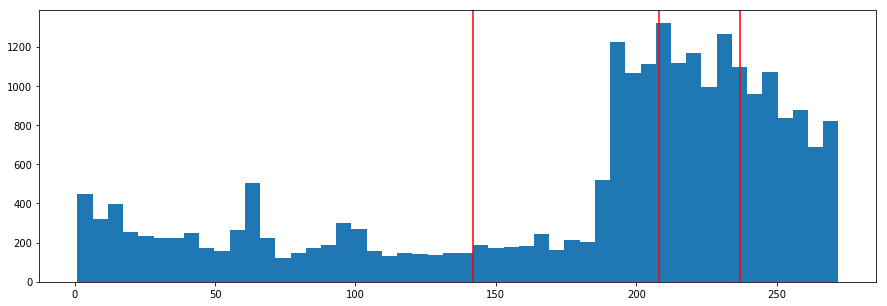

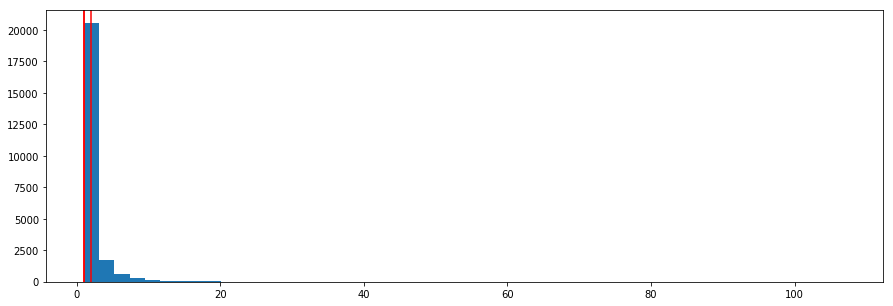

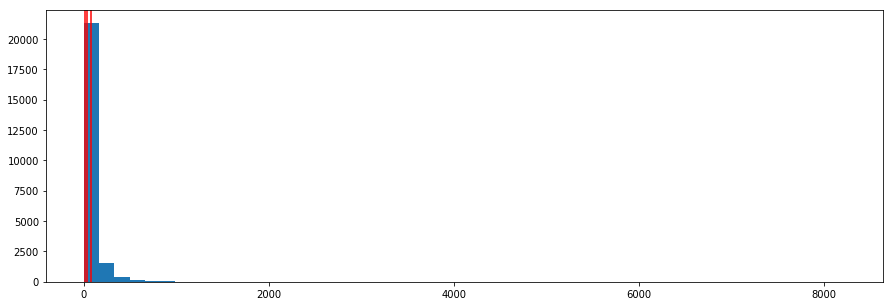

In [58]:
for col in ['recency', 'frequency', 'monetary']:
    plt.figure(figsize=(15,5))
    plt.hist(rfm[col],  bins=50)
    for p in [25, 50, 75]:
        plt.axvline(x=np.percentile(rfm[col],p), color='red')
    plt.show()  

** Both frequency and monetary have exponential distributions **

In [59]:
py.iplot([go.Scatter3d(x=rfm['recency'], y=rfm['frequency'], z=rfm['monetary'], mode='markers')])

---------------------------------------------------

# Machine learning algorithm - KMeans

In [60]:
from sklearn.cluster import KMeans

In [61]:
x = rfm[['recency', 'frequency', 'monetary']].values
x

array([[272.  ,   1.  ,  11.77],
       [261.  ,   2.  ,  89.  ],
       [181.  ,   3.  ,  61.06],
       ...,
       [161.  ,   3.  , 121.7 ],
       [189.  ,   1.  ,  25.74],
       [188.  ,   2.  ,  94.08]])

In [62]:
model = KMeans(n_clusters=5)

In [63]:
labels = model.fit_predict(x)

In [64]:
labels

array([0, 0, 0, ..., 3, 0, 0], dtype=int32)

In [65]:
labels.dtype

dtype('int32')

In [66]:
len(labels)

23570

In [67]:
py.iplot([go.Scatter3d(x=rfm['recency'],
                      y=rfm['frequency'],
                      z=rfm['monetary'],
                      mode='markers',
                      marker={'color':labels})])

## We use a robust scale

In [68]:
from scipy import stats

In [69]:
rfm_original = rfm.copy()

In [70]:
rfm['frequency']=stats.boxcox(rfm['frequency']+0.01)[0]
rfm['monetary']=stats.boxcox(rfm['monetary']+0.01)[0]


In [71]:
x = rfm[['recency', 'frequency', 'monetary']].values

In [72]:
labels = model.fit_predict(x_scaled)

NameError: name 'x_scaled' is not defined

In [ ]:
py.iplot([go.Scatter3d(x=rfm['recency'],
                      y=rfm['frequency'],
                      z=rfm['monetary'],
                      mode='markers',
                      marker={'color':labels})])

## Machine learning - DBScan

In [78]:
from sklearn.cluster import DBSCAN

model_dbscan = DBSCAN(eps=1)

In [79]:
lables_dbscan = model_dbscan.fit_predict(x_scaled)

NameError: name 'x_scaled' is not defined

In [75]:
rfm_original.head()

customerID  recency  frequency  monetary
0      00001    272.0        1.0     11.77
1      00002    261.0        2.0     89.00
2      00003    181.0        3.0     61.06
3      00004     59.0        3.0     74.02
4      00005     15.0        8.0    261.21